<a href="https://colab.research.google.com/github/UDAY-CHAITANYA-G/electricity-load-forecasting/blob/main/Load_Demand_prediction_(520106%2C502117%2C520118%2C520131%2C520148)_jpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd                                                                     #importing pandas for reading data

import numpy as np                                                                      #numpy for mathematical cal

import matplotlib.pyplot as plt                                                          #for ploting the graph



In [ ]:
# import treeFuctions as tf
import numpy as np

import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dataset = pd.read_csv("/content/drive/MyDrive/testset/train_dataset.csv")

print(dataset)

        week_X-2   week_X-3   week_X-4       MA_X-4  dayOfWeek  weekend  \
0       962.2865   906.9580   970.3450   938.004850          1        1   
1       933.3221   863.5135   912.1755   900.284075          1        1   
2       903.9817   848.4447   900.2688   881.704325          1        1   
3       900.9995   839.8821   889.9538   876.458825          1        1   
4       904.3481   847.1073   893.6865   879.190775          1        1   
...          ...        ...        ...          ...        ...      ...   
36715  1362.1477  1376.6220  1335.4711  1360.112475          4        0   
36716  1330.7467  1338.3879  1305.3631  1332.959900          4        0   
36717  1275.5550  1281.6932  1240.1208  1279.486450          4        0   
36718  1200.3537  1209.2950  1165.0237  1199.699525          4        0   
36719  1141.5161  1149.9883  1099.2100  1130.238133          5        0   

       holiday  Holiday_ID  hourOfDay    T2M_toc     DEMAND  
0            0           0          1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
 

# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 100)



#selecting rows , and coloumns
# all rows by using : and coloumn1 by 1:2 
X  = df_train.iloc[1:,1:-1] 

print(X)

y = df_train.iloc[1:,1:-1]

print(y)

        week_X-3   week_X-4       MA_X-4  dayOfWeek  weekend  holiday  \
30809  1229.8917  1313.1488  1231.737425          3        0        0   
34600  1316.7721  1359.7289  1327.326533          7        0        0   
2599   1279.1149  1257.2713  1277.304475          4        0        0   
20407  1282.9495  1312.3893  1314.740600          4        0        0   
15717  1118.1956  1133.1349  1109.061425          4        0        0   
...          ...        ...          ...        ...      ...      ...   
16734  1059.1420  1024.3904  1062.085467          5        0        0   
16304  1143.2065  1155.9640  1177.621925          1        1        0   
79     1231.2967  1183.9851  1185.902650          4        0        0   
12119  1031.3609  1064.7172  1041.212875          2        1        0   
14147  1116.9216  1132.6373  1117.270550          2        1        0   

       Holiday_ID  hourOfDay    T2M_toc  
30809           0         18  27.920282  
34600           0         17  27.297906

In [ ]:
X_test = df_test.iloc[:,1:] 
X_test1 = X_test.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis=1)
y_test = df_test.iloc[:,1:]
y_test1 = y_test.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis = 1)



In [ ]:
from sklearn.tree import DecisionTreeRegressor     #importing the regressor
regressor = DecisionTreeRegressor(random_state=0)  #creating a regressor object for the decision tree
X= df_train.iloc[:,1:]
y = df_train.iloc[:,1:]
X = X.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis=1) #droping the features that have high VIF values (>5)
y =y.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis=1)
regressor.fit(X,y)



DecisionTreeRegressor(random_state=0)

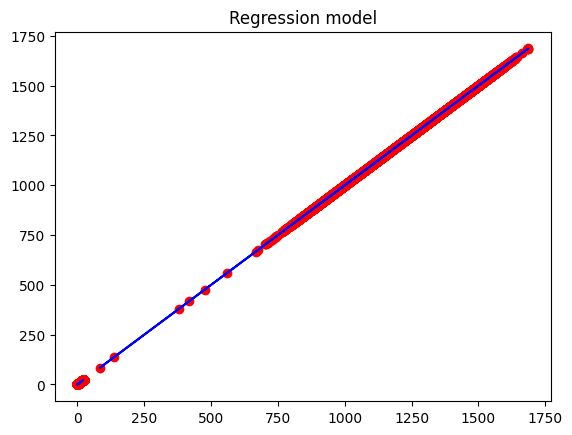

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import csv

X= df_train.iloc[:,1:]
y = df_train.iloc[:,1:]
X = X.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis=1)
y =y.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis=1)
plt.scatter(X,y,color = 'red')
plt.plot(X,regressor.predict(X),color = 'blue')
plt.title("Regression model")
plt.xlabel("")
plt.ylabel('')
plt.show()

In [ ]:
###       testing the model built using  ""DessionTreeRegression""  on testdata set


import pandas as pd

test = df_test
X_new = test.iloc[:,1:]
X_new = X_new.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis =1)
y_pred = regressor.predict(X_new)
y_pred
y = test.iloc[:,1:]
y = y.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis =1)

from sklearn.metrics import r2_score
r2_score(y_true = y, y_pred = y_pred)


0.9419405215422714

In [ ]:
#buliding ML model using MLPRegressor            used data points (25703)    

from sklearn.neural_network import MLPRegressor
  
X= df_train.iloc[:,1:]
y = df_train.iloc[:,1:]

X = X.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis=1) #droping the features that have high VIF values (>5)
y =y.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis=1)

mlp = MLPRegressor(hidden_layer_sizes=(7),
                    random_state=4,
                    verbose= True,
                    activation= 'relu',
                    learning_rate_init=0.01)


mlp.fit(X,y)

Iteration 1, loss = 6124.58348658
Iteration 2, loss = 9.20461697
Iteration 3, loss = 8.55444593
Iteration 4, loss = 7.87903803
Iteration 5, loss = 7.27126277
Iteration 6, loss = 6.72414387
Iteration 7, loss = 6.26652378
Iteration 8, loss = 5.87782604
Iteration 9, loss = 5.56957589
Iteration 10, loss = 5.31424270
Iteration 11, loss = 5.09926395
Iteration 12, loss = 4.90976880
Iteration 13, loss = 4.75378569
Iteration 14, loss = 4.58430971
Iteration 15, loss = 4.43177395
Iteration 16, loss = 4.29140019
Iteration 17, loss = 4.13143247
Iteration 18, loss = 3.91525019
Iteration 19, loss = 3.71257104
Iteration 20, loss = 3.46540964
Iteration 21, loss = 3.22378864
Iteration 22, loss = 2.87331476
Iteration 23, loss = 2.54041217
Iteration 24, loss = 2.22549216
Iteration 25, loss = 1.71878465
Iteration 26, loss = 1.34763209
Iteration 27, loss = 0.92603235
Iteration 28, loss = 0.67310925
Iteration 29, loss = 0.40414171
Iteration 30, loss = 0.27687595
Iteration 31, loss = 0.14357493
Iteration 32, 

MLPRegressor(hidden_layer_sizes=7, learning_rate_init=0.01, random_state=4,
             verbose=True)

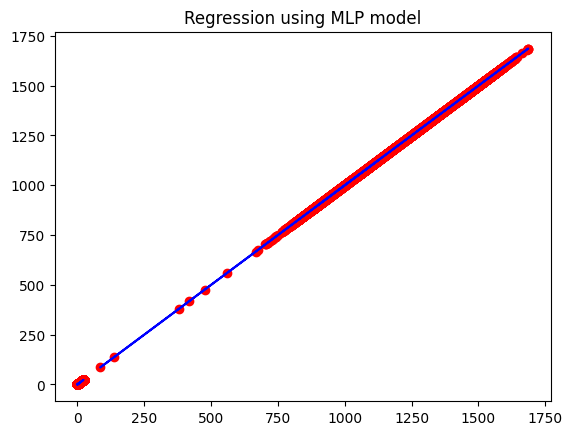

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import csv

X= df_train.iloc[:,1:]
y = df_train.iloc[:,1:]
X = X.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis=1)
y =y.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis=1)
plt.scatter(X,y,color = 'red')
plt.plot(X,mlp.predict(X),color = 'blue')
plt.title("Regression using MLP model")
plt.xlabel("")
plt.ylabel('')
plt.show()

In [ ]:
#### testing the testing set with model developed using  ""MLPRegressor""

test = df_test
X_new = test.iloc[:,1:]
X_new = X_new.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis =1)
y_pred = mlp.predict(X_new)
y_pred
y = test.iloc[:,1:]
y = y.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis =1)

from sklearn.metrics import r2_score
r2_score(y_true = y, y_pred = y_pred)

0.9689968905543799

In [ ]:
X= df_train.iloc[:,1:]
y = df_train.iloc[:,1:]
X = X.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis=1)
y =y.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis=1)



In [ ]:
##   test set
X_test = df_test.iloc[1:,1:] 
X_test1 = X_test.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis=1)
y_test = df_test.iloc[1:,1:]
y_test1 = y_test.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis = 1)



In [ ]:
###       testing the model built using  ""DessionTreeRegression""  on testdata set


import pandas as pd

test = df_test
X_new = test.iloc[:,1:]
X_new = X_new.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis =1)
y_pred = regressor.predict(X_new)
y_pred
y = test.iloc[:,1:]
y = y.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis =1)

from sklearn.metrics import r2_score
r2_score(y_true = y, y_pred = y_pred)



0.9419405215422714

In [ ]:
#### testing the testing set with model developed using  ""MLPRegressor""

test = df_test
X_new = test.iloc[:,1:]
X_new = X_new.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis =1)
y_pred = mlp.predict(X_new)
y_pred
y = test.iloc[:,1:]
y = y.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis =1)

from sklearn.metrics import r2_score
r2_score(y_true = y, y_pred = y_pred)

0.9689968905543799

In [ ]:
###       testing the model built using  ""DessionTreeRegression""  on 2nd set of test data set


import pandas as pd

test = pd.read_csv('/content/drive/MyDrive/testset/test_dataframes.csv')
X_new = test.iloc[:,1:]
X_new = X_new.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis =1)
y_pred = regressor.predict(X_new)
y_pred
y = test.iloc[:,1:]
y = y.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis =1)

from sklearn.metrics import r2_score
r2_score(y_true = y, y_pred = y_pred)



0.7506242977589643

In [ ]:
##     testing the model built using ""MLPRegressor""  on secound set of test data

import pandas as pd

test = pd.read_csv('/content/drive/MyDrive/testset/test_dataframes.csv')
X_new = test.iloc[:,1:]
X_new = X_new.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis =1)
y_pred = mlp.predict(X_new)
y_pred
y = test.iloc[:,1:]
y = y.drop(["MA_X-4", "T2M_toc", "week_X-4", "week_X-3",'holiday','Holiday_ID'],axis =1)

from sklearn.metrics import r2_score
r2_score(y_true = y, y_pred = y_pred)
 

0.9766536421119828

In [ ]:
energy1 = pd.read_csv("/content/drive/MyDrive/testset/train_dataset.csv")            #assigning a variable for the training set
energy1